In [1]:
from matplotlib.pyplot import cm
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from scipy import constants as cst
import sys, os, git
import warnings
warnings.filterwarnings("ignore")

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_figures = current_path[len(git_path):] + '/'
path_in_folder = current_path[len(git_path)+1:]

In [4]:
sys.path.append(git_path + "/.submodules/pyplot-perso")
from plttools import PltTools

In [5]:
data_path = git_path + "/.submodules/dataset-water-in-silica/analysis/"
cmap_cool = cm.cool
cmap_dark_blue_to_cyan = LinearSegmentedColormap.from_list('dark_blue_to_cyan', ['#1D11CB', cmap_cool(0.0)])
cmap_dark_blue_to_pink = LinearSegmentedColormap.from_list('dark_blue_to_cyan', ['#1D11CB', cmap_cool(1.0)])
cmap_cyan_to_green_blue = LinearSegmentedColormap.from_list('cyan_to_green_blue',
    ['#00FFFF', '#00FA9A', '#3683e2']  # Cyan → Medium Spring Green → Your Blue Shade
)

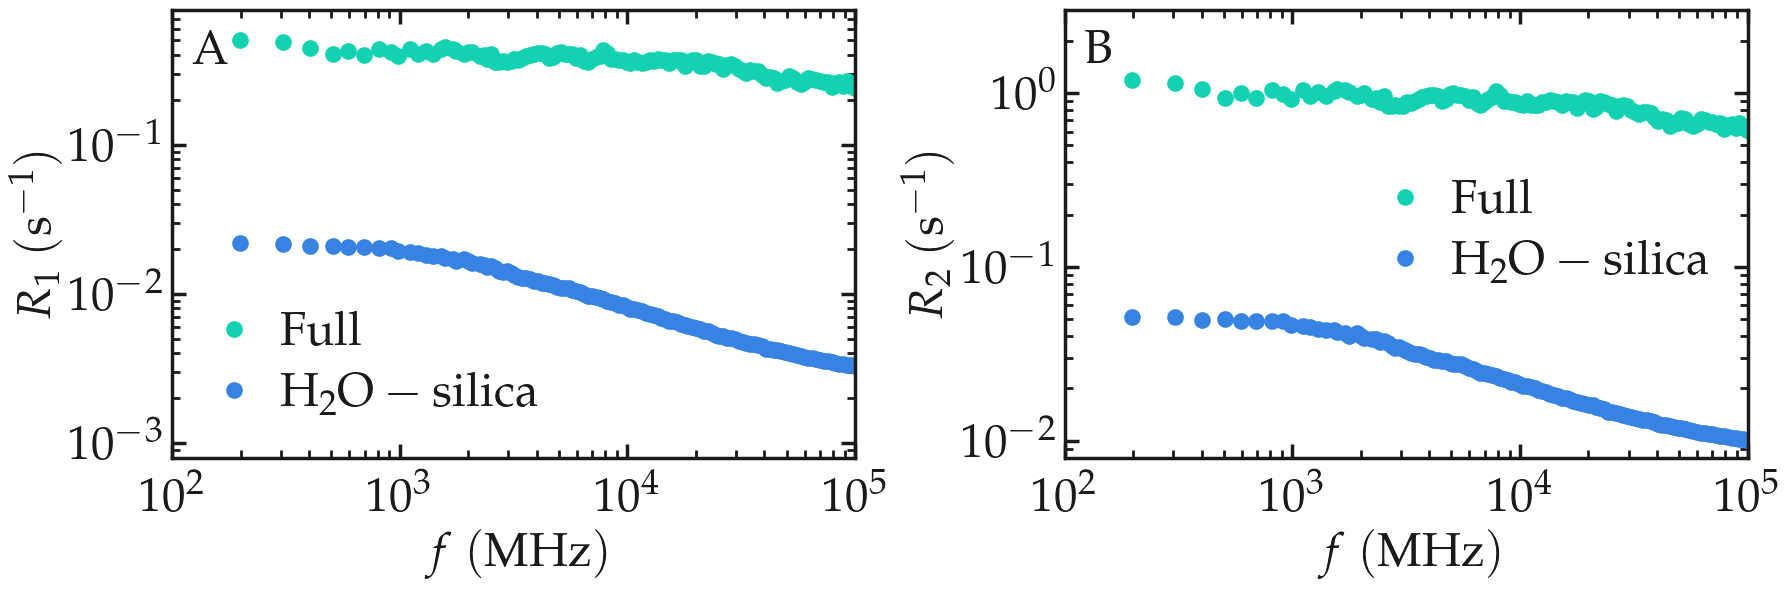

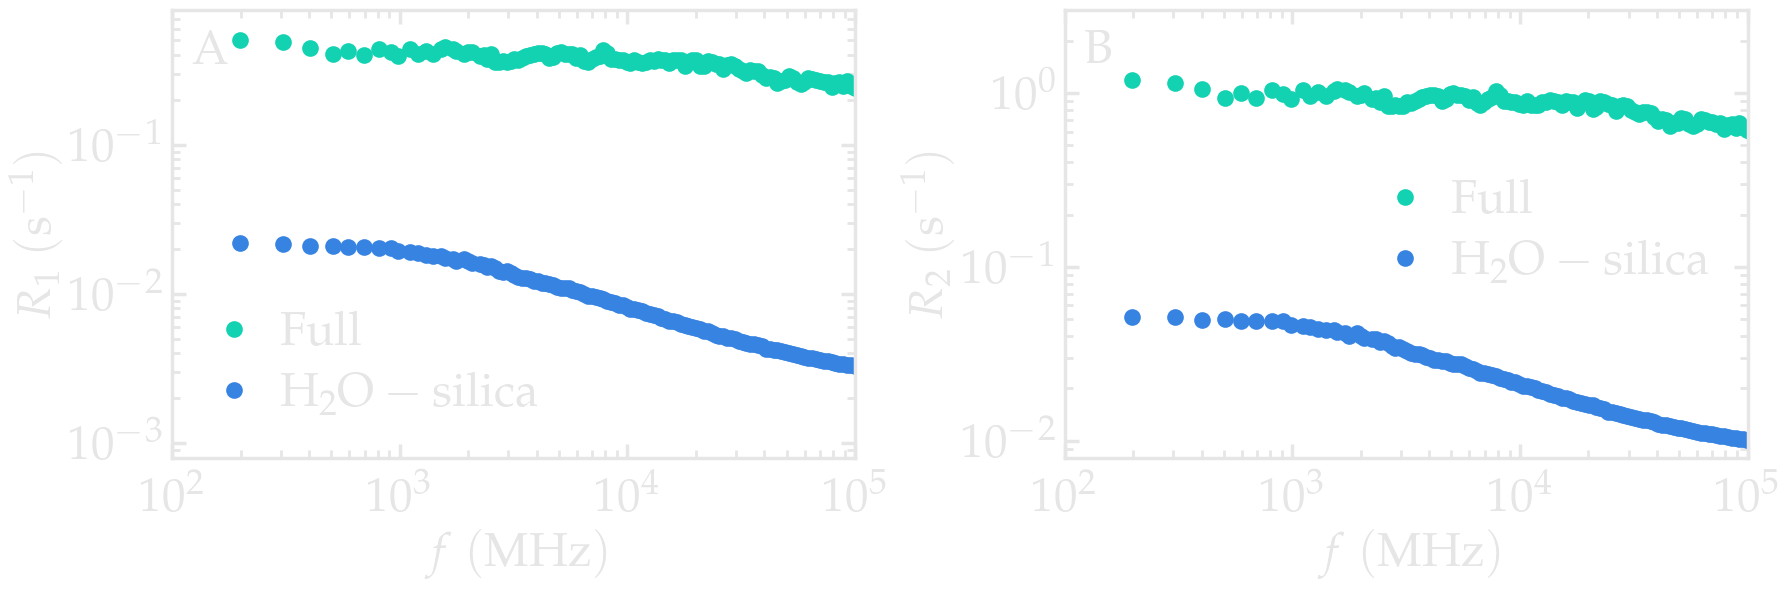

In [26]:
filename = "nmrd"

for dark_mode in [False, True]:
        
    colors = cmap_cyan_to_green_blue(np.linspace(0, 1, 4))

    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6), dark_mode = dark_mode,
                            transparency = True, use_serif=True, n_colone = 2)

    # Panel 1
    myplt.add_panel()
    f, R1 = np.loadtxt(data_path+f"nmr_full/R1_vs_f.dat").T
    myplt.add_plot(x = f, y = R1, type = "loglog", linewidth_data = 3,
                marker = "o", data_color = colors[2][:3], markersize = 12,
                data_label = r"$\mathrm{Full}$")
    
    if False:
        f, R1 = np.loadtxt(data_path+f"nmr_water_intra/R1_vs_f.dat").T
        myplt.add_plot(x = f, y = R1, type = "loglog", linewidth_data = 3,
                    marker = ".", data_color = colors[0][:3], markersize = 12,
                    data_label = r"$\mathrm{H}_2\mathrm{O}$")
        
        f, R1 = np.loadtxt(data_path+f"nmr_water_inter/R1_vs_f.dat").T
        myplt.add_plot(x = f, y = R1, type = "loglog", linewidth_data = 3,
                    marker = ".", data_color = colors[1][:3], markersize = 12,
                    data_label = r"$\mathrm{H}_2\mathrm{O}$")
    
    f, R1 = np.loadtxt(data_path+f"nmr_water_silica/R1_vs_f.dat").T
    myplt.add_plot(x = f, y = R1, type = "loglog", linewidth_data = 3,
                marker = "o", data_color = colors[3][:3], markersize = 12,
                data_label = r"$\mathrm{H}_2\mathrm{O} - \mathrm{silica}$")
    
    myplt.complete_panel(ylabel = r'$R_{1}~(\mathrm{s}^{-1})$', xlabel = r'$f~(\mathrm{MHz})$',
                            xpad = 15, legend=True, handlelength_legend=1)
                            # panel_title = r"H$_2$O molecules")
    myplt.set_boundaries(x_boundaries=(1e2, 1e5), y_boundaries=(8e-4, 0.8))

    # Panel 2
    myplt.add_panel()
    f, R2 = np.loadtxt(data_path+f"nmr_full/R2_vs_f.dat").T
    myplt.add_plot(x = f, y = R2, type = "loglog", linewidth_data = 3,
                marker = "o", data_color = colors[2][:3], markersize = 12,
                data_label = r"$\mathrm{Full}$")
    
    if False:
        f, R1 = np.loadtxt(data_path+f"nmr_water_intra/R1_vs_f.dat").T
        myplt.add_plot(x = f, y = R1, type = "loglog", linewidth_data = 3,
                    marker = ".", data_color = colors[0][:3], markersize = 12,
                    data_label = r"$\mathrm{H}_2\mathrm{O}$")
        
        f, R1 = np.loadtxt(data_path+f"nmr_water_inter/R1_vs_f.dat").T
        myplt.add_plot(x = f, y = R1, type = "loglog", linewidth_data = 3,
                    marker = ".", data_color = colors[1][:3], markersize = 12,
                    data_label = r"$\mathrm{H}_2\mathrm{O}$")
    
    f, R2 = np.loadtxt(data_path+f"nmr_water_silica/R2_vs_f.dat").T
    myplt.add_plot(x = f, y = R2, type = "loglog", linewidth_data = 3,
                marker = "o", data_color = colors[3][:3], markersize = 12,
                data_label = r"$\mathrm{H}_2\mathrm{O} - \mathrm{silica}$")
    
    myplt.complete_panel(ylabel = r'$R_{2}~(\mathrm{s}^{-1})$', xlabel = r'$f~(\mathrm{MHz})$',
                            xpad = 15, legend=True, handlelength_legend=1)
                            # panel_title = r"H$_2$O molecules")
    myplt.set_boundaries(x_boundaries=(1e2, 1e5), y_boundaries=(8e-3, 3))

    myplt.add_subplotlabels(type_label_panel = "A")
    myplt.save_figure(filename = filename, saving_path = git_path+path_figures)